<a href="https://colab.research.google.com/github/SanjayS2348553/Trimester-3/blob/main/2348553_DL_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow.keras.backend as K
from sklearn.metrics import accuracy_score

In [16]:
df=pd.read_excel('/content/Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [17]:
df.shape

(7043, 33)

In [18]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [19]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [20]:
useful_columns = ['Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
                  'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
                  'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                  'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges',
                  'Churn Value']

df_filtered = df[useful_columns]

In [26]:
X = pd.DataFrame({'feature1': [1, 2, 3], 'feature2': [4, 5, 6]})
y = pd.Series([0, 1, 0])
numeric_cols = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
df_filtered.fillna(0, inplace=True)

<ipython-input-27-42b9eadb2413>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(0, inplace=True)


In [28]:
df_filtered.isnull().sum()

Country              0
State                0
City                 0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
dtype: int64

In [29]:
# Baseline DNN architecture
model_baseline = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_baseline.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_baseline = model_baseline.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6729 - accuracy: 0.5000 - val_loss: 0.5742 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 73ms/step - loss: 0.6608 - accuracy: 0.5000 - val_loss: 0.5726 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 82ms/step - loss: 0.6490 - accuracy: 0.5000 - val_loss: 0.5711 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 80ms/step - loss: 0.6376 - accuracy: 0.5000 - val_loss: 0.5698 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 75ms/step - loss: 0.6269 - accuracy: 0.5000 - val_loss: 0.5687 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 85ms/step - loss: 0.6165 - accuracy: 0.5000 - val_loss: 0.5676 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 66ms/step - loss: 0.6071 - accuracy: 0.5000 - val_loss: 0.5667 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=============

In [30]:
model_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.8229 - accuracy: 0.0000e+00 - val_loss: 0.6244 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 63ms/step - loss: 0.5932 - accuracy: 0.5000 - val_loss: 0.6242 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 65ms/step - loss: 0.6070 - accuracy: 0.5000 - val_loss: 0.6242 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 69ms/step - loss: 0.6343 - accuracy: 0.5000 - val_loss: 0.6242 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 46ms/step - loss: 0.5699 - accuracy: 0.5000 - val_loss: 0.6247 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 45ms/step - loss: 0.6788 - accuracy: 1.0000 - val_loss: 0.6249 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 43ms/step - loss: 0.7153 - accuracy: 0.5000 - val_loss: 0.6251 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=========

In [32]:
# Implement layer-wise dropout
model_layerwise_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_layerwise_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_layerwise_dropout = model_layerwise_dropout.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6071 - accuracy: 0.5000 - val_loss: 0.6113 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 65ms/step - loss: 0.5896 - accuracy: 0.5000 - val_loss: 0.6112 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 66ms/step - loss: 0.5650 - accuracy: 0.5000 - val_loss: 0.6116 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 94ms/step - loss: 0.5619 - accuracy: 1.0000 - val_loss: 0.6116 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 60ms/step - loss: 0.6269 - accuracy: 1.0000 - val_loss: 0.6116 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 80ms/step - loss: 0.5875 - accuracy: 1.0000 - val_loss: 0.6115 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 71ms/step - loss: 0.6100 - accuracy: 0.5000 - val_loss: 0.6114 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=============

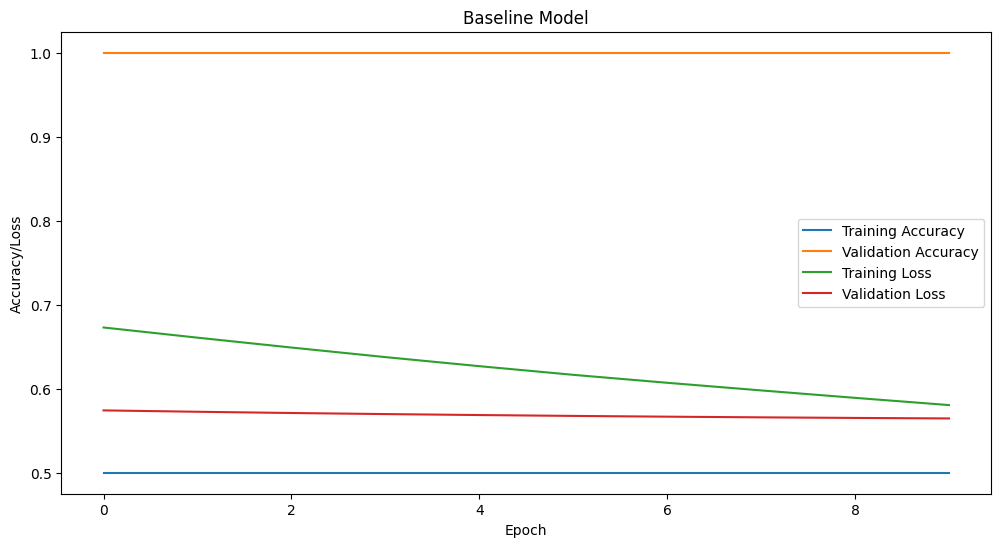

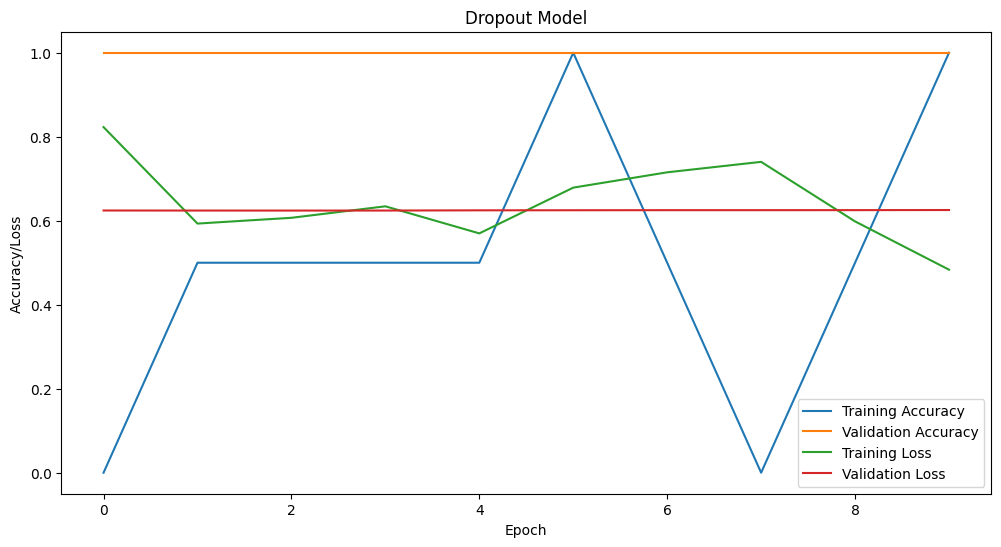

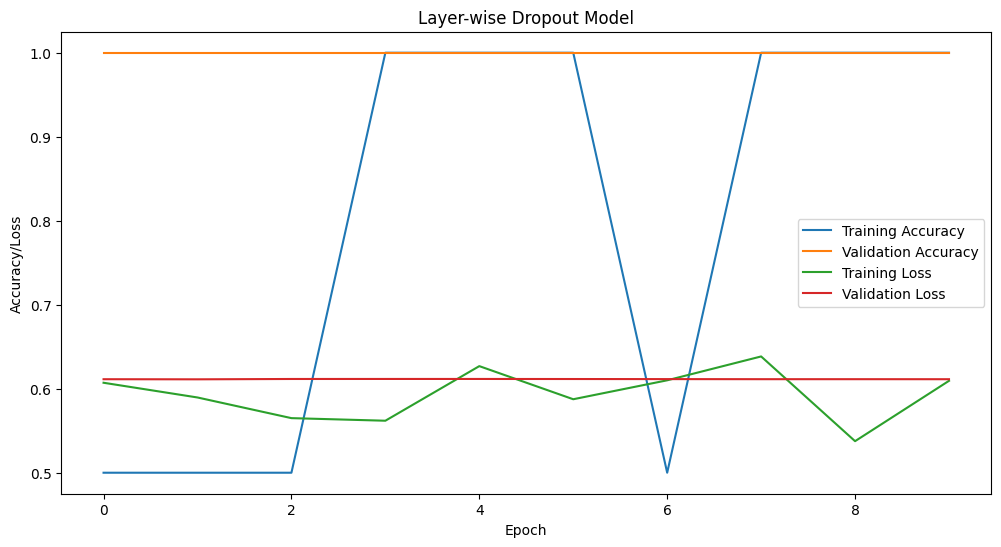

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7080 - accuracy: 0.0000e+00 - val_loss: 0.7328 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 43ms/step - loss: 0.6274 - accuracy: 0.5000 - val_loss: 0.7334 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 59ms/step - loss: 0.6890 - accuracy: 0.5000 - val_loss: 0.7337 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 41ms/step - loss: 0.6708 - accuracy: 0.5000 - val_loss: 0.7338 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 61ms/step - loss: 0.5894 - accuracy: 1.0000 - val_loss: 0.7342 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 58ms/step - loss: 0.7158 - accuracy: 0.5000 - val_loss: 0.7344 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 46ms/step - loss: 0.6226 - accuracy: 1.0000 - val_loss: 0.7345 - val_accuracy: 0.0000e+

In [33]:
# Implement Monte Carlo dropout
class MonteCarloDropout(Dropout):
    def call(self, inputs, training=None):
        if training is None:
            training = K.learning_phase()

        def dropped_inputs():
            return K.dropout(inputs, self.rate, noise_shape=self._get_noise_shape(inputs), seed=self.seed)

        return K.in_train_phase(dropped_inputs, inputs, training=training)

model_mc_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    MonteCarloDropout(0.5),
    Dense(32, activation='relu'),
    MonteCarloDropout(0.5),
    Dense(1, activation='sigmoid')
])
def plot_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/Loss')
    plt.legend()
    plt.show()

plot_history(history_baseline, title='Baseline Model')
plot_history(history_dropout, title='Dropout Model')
plot_history(history_layerwise_dropout, title='Layer-wise Dropout Model')
model_mc_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_mc_dropout = model_mc_dropout.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

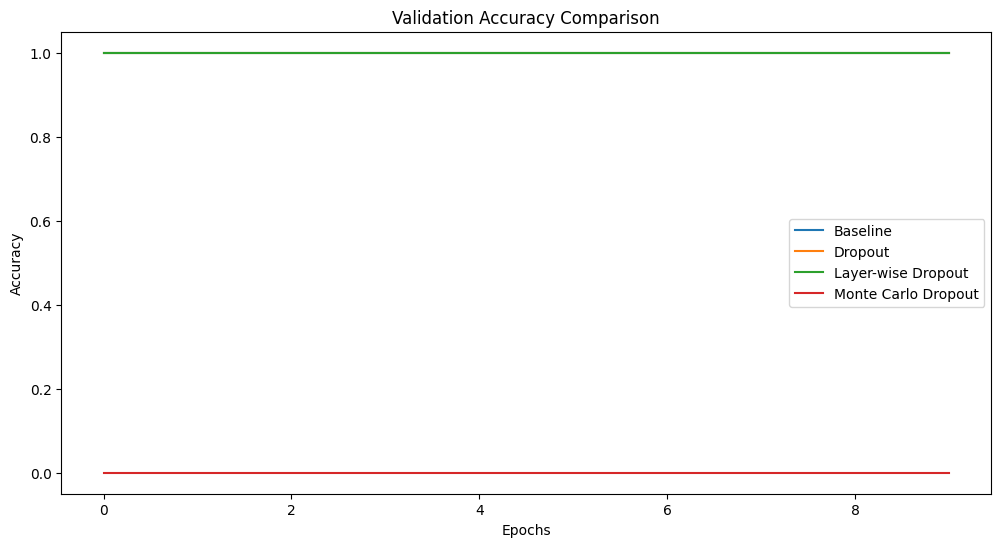

In [35]:
# Train the baseline model
history_baseline = model_baseline.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=0)

# Train the dropout model
history_dropout = model_dropout.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=0)

# Train the layer-wise dropout model
history_layerwise_dropout = model_layerwise_dropout.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=0)

# Train the Monte Carlo dropout model
history_mc_dropout = model_mc_dropout.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=0)

# Compare accuracies
acc_baseline = history_baseline.history['val_accuracy']
acc_dropout = history_dropout.history['val_accuracy']
acc_layerwise_dropout = history_layerwise_dropout.history['val_accuracy']
acc_mc_dropout = history_mc_dropout.history['val_accuracy']

# Plot accuracies
plt.figure(figsize=(12, 6))
plt.plot(acc_baseline, label='Baseline')
plt.plot(acc_dropout, label='Dropout')
plt.plot(acc_layerwise_dropout, label='Layer-wise Dropout')
plt.plot(acc_mc_dropout, label='Monte Carlo Dropout')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()